Q-learning: 10 out of 10 runs reached the goal.


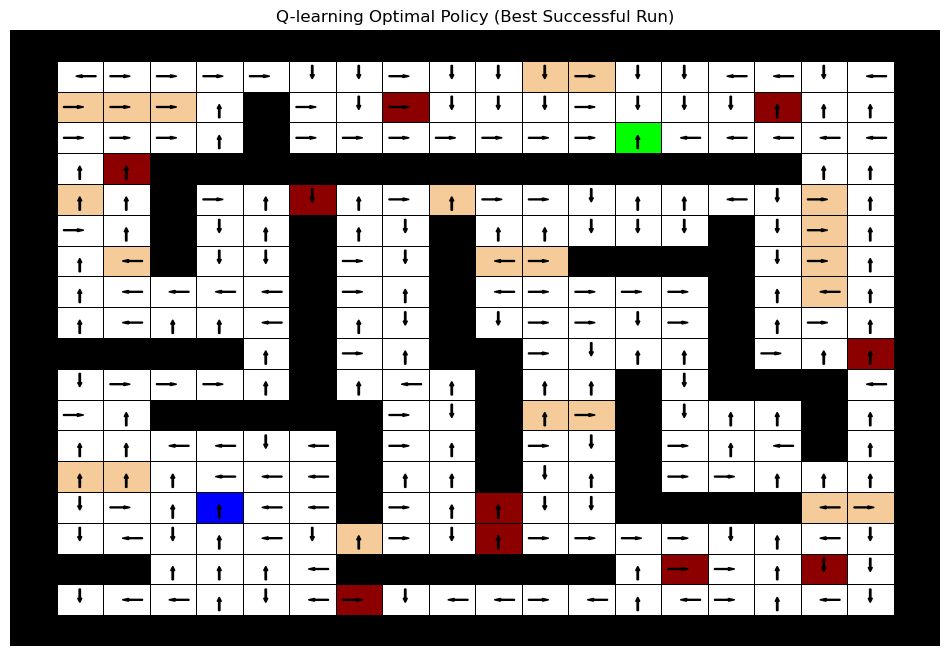

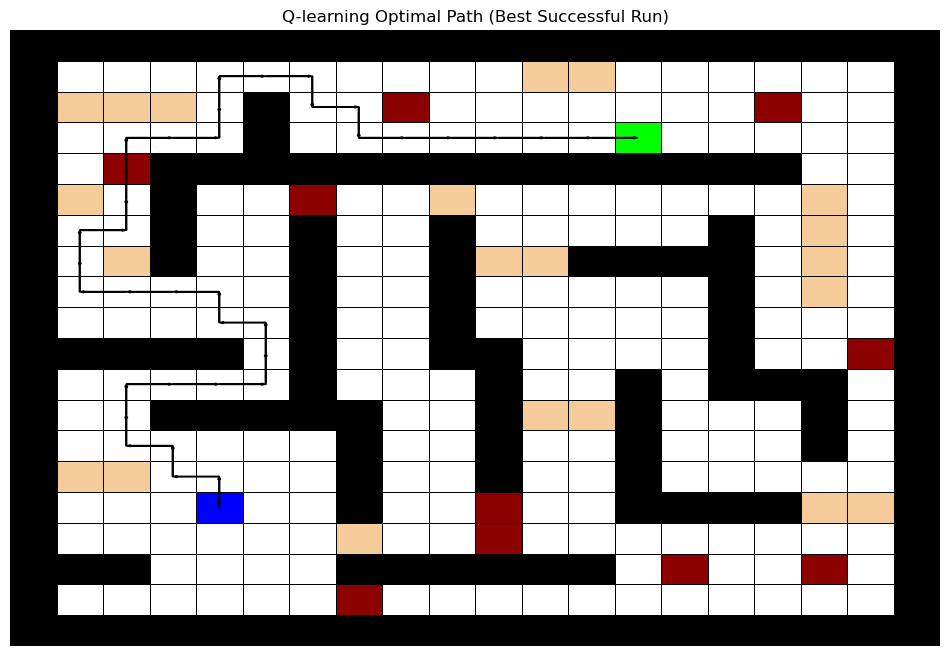

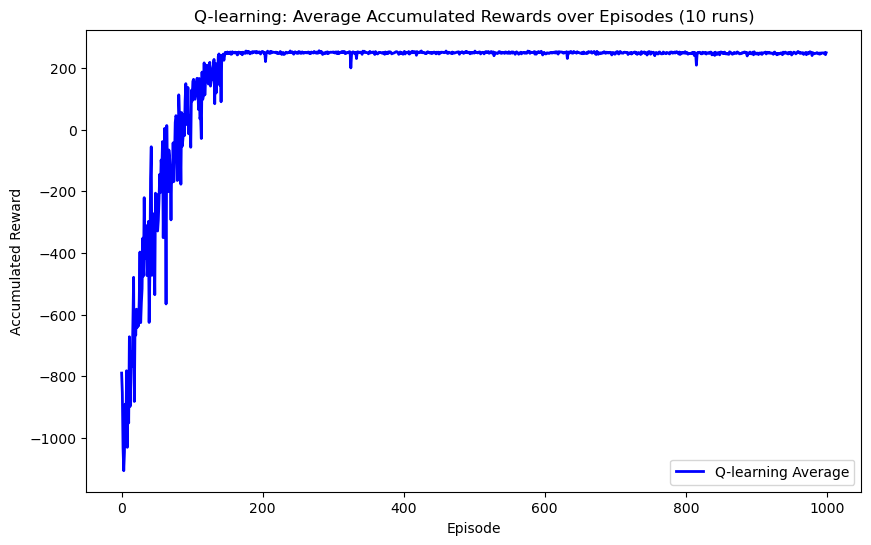

SARSA: 9 out of 10 runs reached the goal.


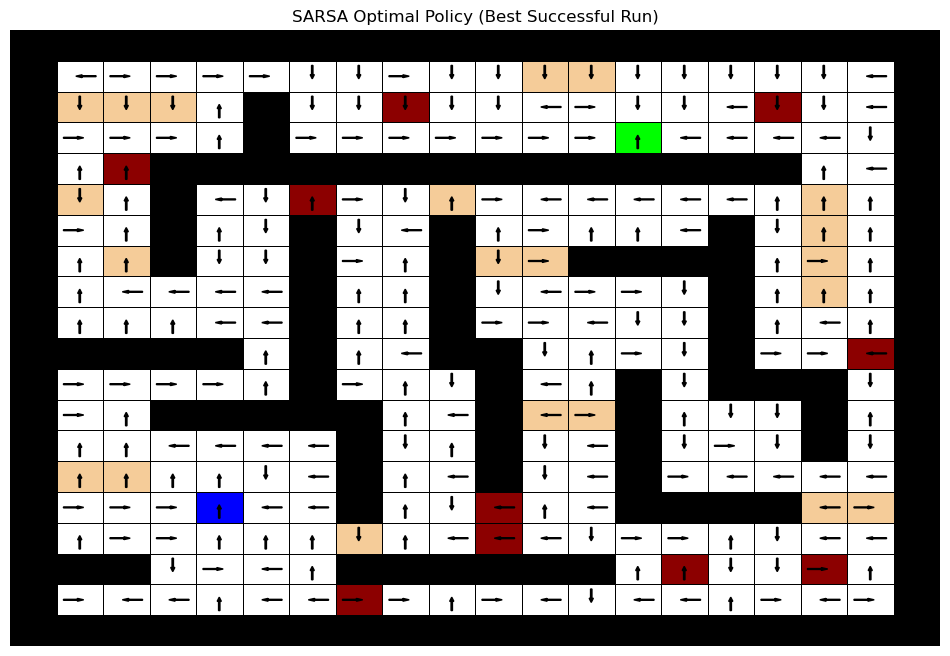

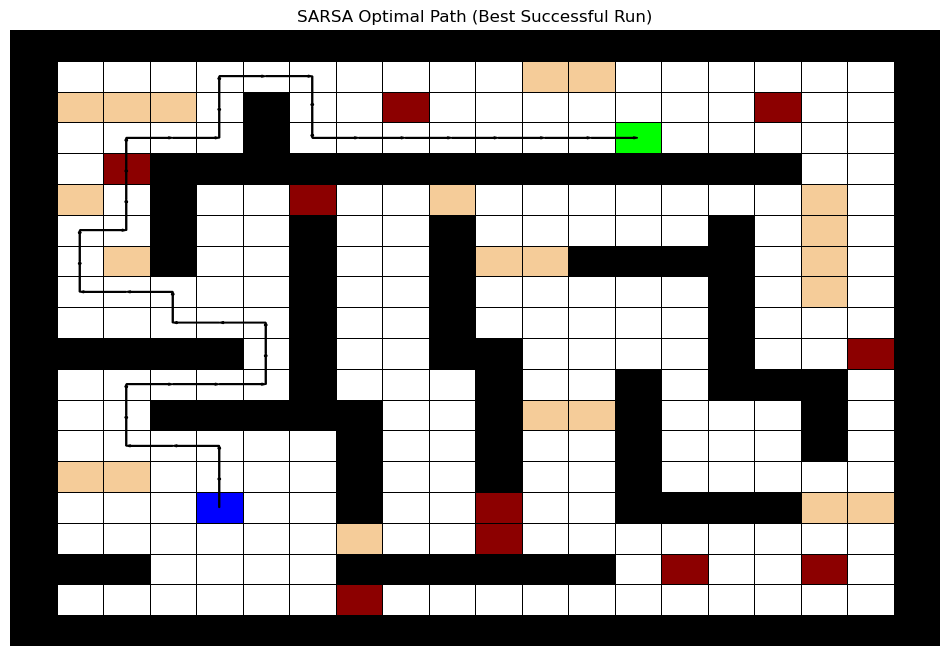

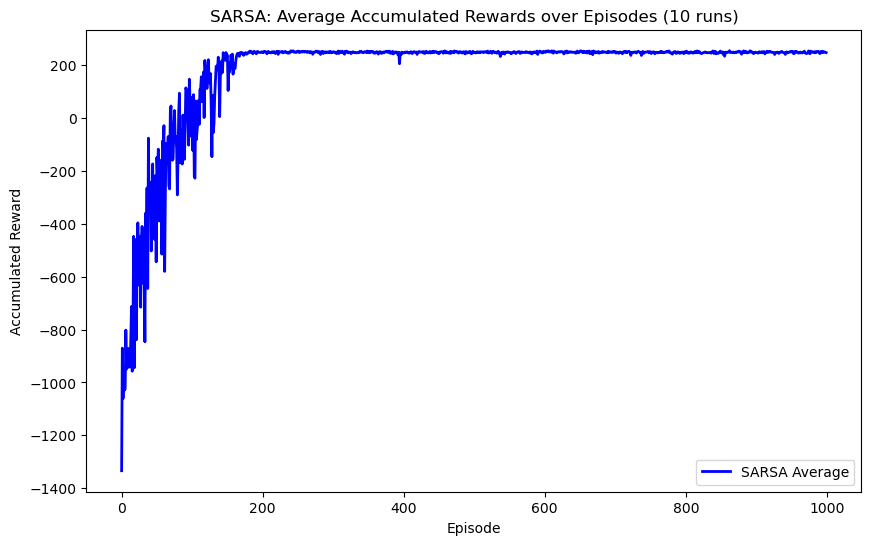

Actor-Critic: 2 out of 10 runs reached the goal.


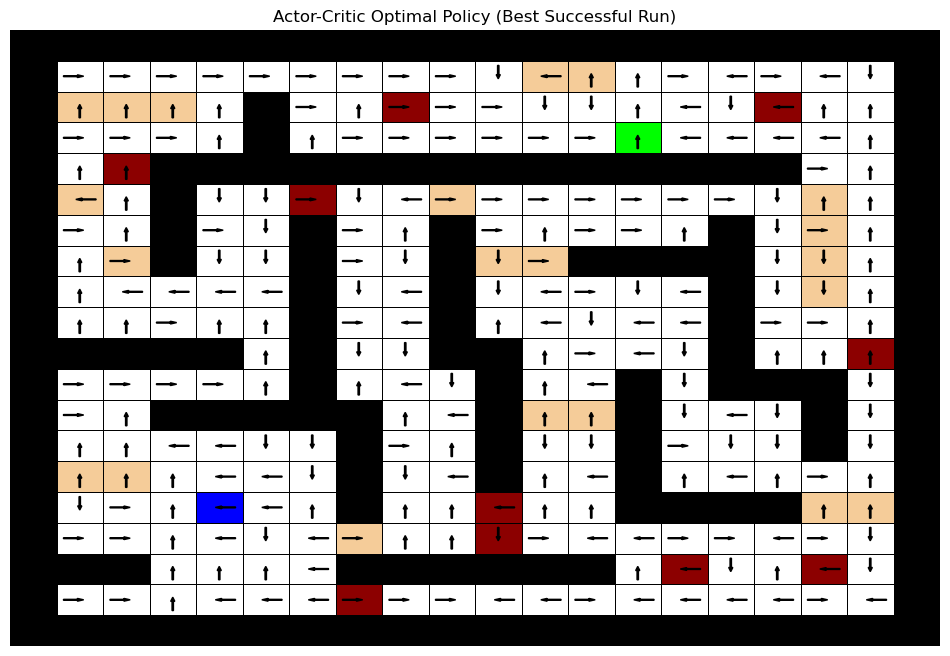

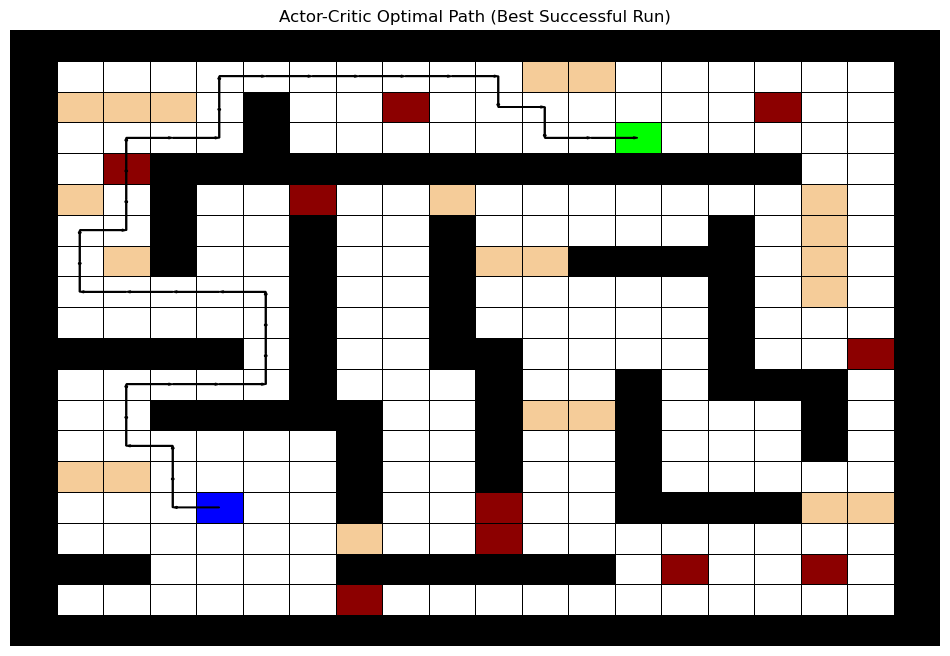

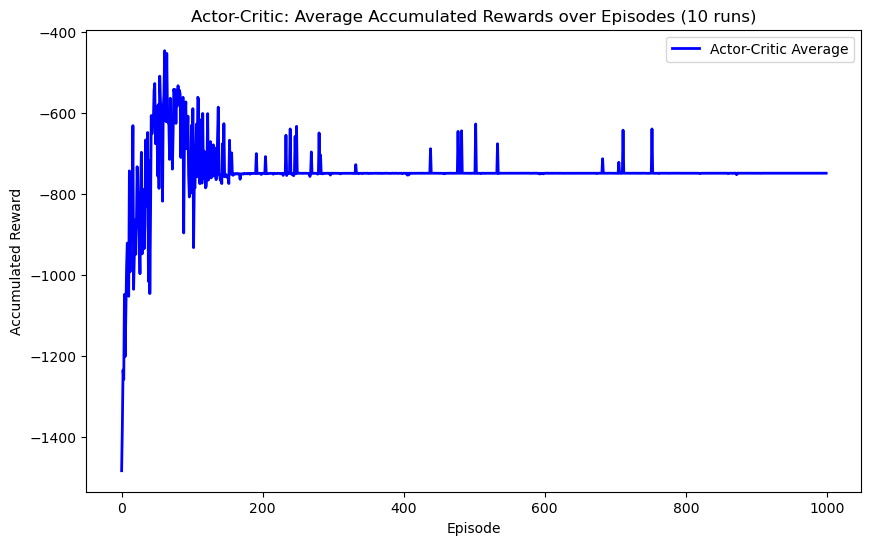

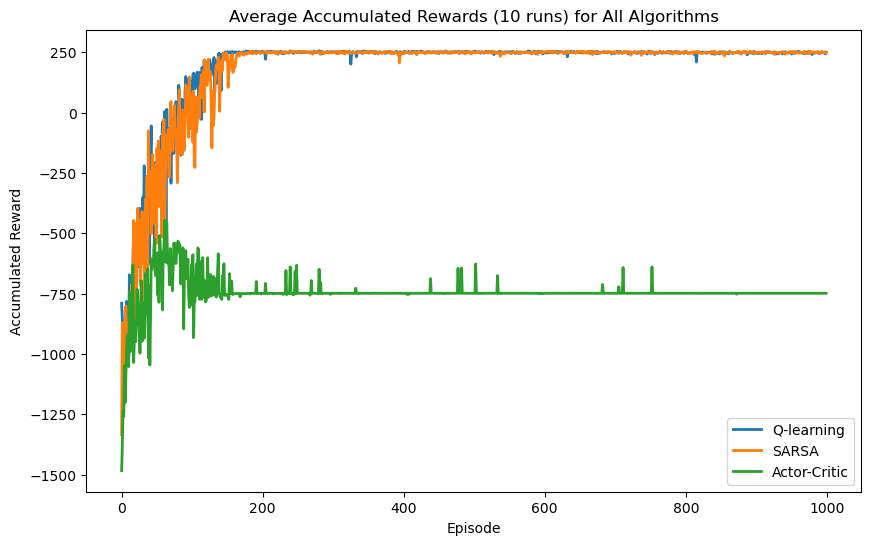

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Maze environment definition (20x20 grid) and cell values
Env = np.zeros([20, 20])
Env[:, [0]] = 1
Env[:, [19]] = 1
Env[0, :] = 1
Env[19, :] = 1

Env[1, 11] = 3; Env[1, 12] = 3
Env[2, 1:4] = [3, 3, 3]; Env[2, 5] = 1; Env[2, 8] = 2; Env[2, 16] = 2
Env[3, 5] = 1; Env[3, 13] = 5   # Goal cell defined here (value 5)
Env[4, 2] = 2; Env[4, 3:17] = np.ones([1, 14])
Env[5, 1] = 3; Env[5, 3] = 1; Env[5, 6] = 2; Env[5, 9] = 3; Env[5, 17] = 3
Env[6, 3] = 1; Env[6, 6] = 1; Env[6, 9] = 1; Env[6, 15] = 1; Env[6, 17] = 3
Env[7, 2] = 3; Env[7, 3] = 1; Env[7, 6] = 1; Env[7, 9] = 1
Env[7, 10:12] = [3, 3]; Env[7, 12:16] = np.ones([1, 4]); Env[7, 17] = 3
Env[8, 6] = 1; Env[8, 9] = 1; Env[8, 15] = 1; Env[8, 17] = 3
Env[9, 6] = 1; Env[9, 9] = 1; Env[9, 15] = 1
Env[10, 1:5] = np.ones([1, 4]); Env[10, 6] = 1; Env[10, 9:11] = [1, 1]
Env[10, 15] = 1; Env[10, 18] = 2
Env[11, 6] = 1; Env[11, 10] = 1; Env[11, 13] = 1; Env[11, 15:18] = [1, 1, 1]
Env[12, 3:8] = np.ones([1, 5]); Env[12, 10] = 1; Env[12, 11:13] = [3, 3]
Env[12, 13] = 1; Env[12, 17] = 1
Env[13, 7] = 1; Env[13, 10] = 1; Env[13, 13] = 1; Env[13, 17] = 1
Env[14, 1:3] = [3, 3]; Env[14, 7] = 1; Env[14, 10] = 1; Env[14, 13] = 1
Env[15, 4] = 4; Env[15, 7] = 1; Env[15, 10] = 2; 
Env[15, 13:17] = [1, 1, 1, 1]; Env[15, 17:19] = [3, 3]
Env[16, 7] = 3; Env[16, 10] = 2
Env[17, 1:3] = [1, 1]; Env[17, 7:13] = [1, 1, 1, 1, 1, 1]
Env[17, 14] = 2; Env[17, 17] = 2
Env[18, 7] = 2

# Color encoding for the maze cells
colors = {
    0: [1, 1, 1],        # White
    1: [0, 0, 0],        # Wall (Black)
    2: [0.55, 0, 0],     # Oil (Brown)
    3: [0.96, 0.8, 0.6],  # Bump
    4: [0, 0, 1],        # Start (Blue)
    5: [0, 1, 0]         # Goal (Green)
}

# The state matrix mapping each valid cell to a unique state number
State_Matrix = np.array([
 [0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0],
 [0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18, 0],
 [0,  19,  20,  21,  22,   0,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35, 0],
 [0,  36,  37,  38,  39,   0,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52, 0],
 [0,  53,  54,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  55,  56, 0],
 [0,  57,  58,   0,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73, 0],
 [0,  74,  75,   0,  76,  77,   0,  78,  79,   0,  80,  81,  82,  83,  84,   0,  85,  86,  87, 0],
 [0,  88,  89,   0,  90,  91,   0,  92,  93,   0,  94,  95,   0,   0,   0,   0,  96,  97,  98, 0],
 [0,  99, 100, 101, 102, 103,   0, 104, 105,   0, 106, 107, 108, 109, 110,   0, 111, 112, 113, 0],
 [0, 114, 115, 116, 117, 118,   0, 119, 120,   0, 121, 122, 123, 124, 125,   0, 126, 127, 128, 0],
 [0,   0,   0,   0,   0, 129,   0, 130, 131,   0,   0, 132, 133, 134, 135,   0, 136, 137, 138, 0],
 [0, 139, 140, 141, 142, 143,   0, 144, 145, 146,   0, 147, 148,   0, 149,   0,   0,   0, 150, 0],
 [0, 151, 152,   0,   0,   0,   0,   0, 153, 154,   0, 155, 156,   0, 157, 158, 159,   0, 160, 0],
 [0, 161, 162, 163, 164, 165, 166,   0, 167, 168,   0, 169, 170,   0, 171, 172, 173,   0, 174, 0],
 [0, 175, 176, 177, 178, 179, 180,   0, 181, 182,   0, 183, 184,   0, 185, 186, 187, 188, 189, 0],
 [0, 190, 191, 192, 193, 194, 195,   0, 196, 197, 198, 199, 200,   0,   0,   0,   0, 201, 202, 0],
 [0, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 0],
 [0,   0,   0, 221, 222, 223, 224,   0,   0,   0,   0,   0,   0, 225, 226, 227, 228, 229, 230, 0],
 [0, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 0],
 [0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0]
])

# Action encodings and number of actions
A_UP, A_RIGHT, A_DOWN, A_LEFT = 0, 1, 2, 3
num_actions = 4

# Helper functions for movement
def is_wall(r, c, Env):
    rows, cols = Env.shape
    if r < 0 or r >= rows or c < 0 or c >= cols:
        return True
    return (Env[r, c] == 1)

def next_cell(r, c, action):
    if action == A_UP:
        return (r-1, c)
    elif action == A_RIGHT:
        return (r, c+1)
    elif action == A_DOWN:
        return (r+1, c)
    elif action == A_LEFT:
        return (r, c-1)

def get_perpendicular_actions(a):
    if a == A_UP:
        return [A_LEFT, A_RIGHT]
    elif a == A_RIGHT:
        return [A_UP, A_DOWN]
    elif a == A_DOWN:
        return [A_RIGHT, A_LEFT]
    elif a == A_LEFT:
        return [A_DOWN, A_UP]

# Returns the next state and reward given state s and action a
def step_reward_and_next_state(s, a, Env, state_to_rc, rc_to_state):
    (r, c) = state_to_rc[s]
    # If already at goal, remain with 0 reward.
    if Env[r, c] == 5:
        return (s, 0)
    (r_next, c_next) = next_cell(r, c, a)
    if is_wall(r_next, c_next, Env):
        return (s, -1.8)
    else:
        s_next = rc_to_state[(r_next, c_next)]
        cell_type = Env[r_next, c_next]
        if cell_type == 2:
            return (s_next, -6)
        elif cell_type == 3:
            return (s_next, -11)
        elif cell_type == 5:
            return (s_next, 300)
        else:
            return (s_next, -1)

# Create lookup tables for state-to-(row, col) and vice-versa.
def create_lookup_tables(State_Matrix):
    rows, cols = State_Matrix.shape
    num_states = np.max(State_Matrix)
    state_to_rc = [None]*(num_states+1)  # 1-indexed
    rc_to_state = {}
    for r in range(rows):
        for c in range(cols):
            s = State_Matrix[r, c]
            if s != 0:
                state_to_rc[s] = (r, c)
                rc_to_state[(r, c)] = s
    return state_to_rc, rc_to_state

# Find start (cell with value 4) and goal (cell with value 5)
def find_start_and_goal(Env, rc_to_state):
    s_start, s_goal = None, None
    rows, cols = Env.shape
    for r in range(rows):
        for c in range(cols):
            if Env[r, c] == 4:
                s_start = rc_to_state[(r, c)]
            elif Env[r, c] == 5:
                s_goal = rc_to_state[(r, c)]
    return s_start, s_goal

# Use a learned policy to extract a path (greedy rollout)
def extract_path(pi, s_start, s_goal, Env, state_to_rc, rc_to_state, max_steps=1000):
    path = []
    s = s_start
    for _ in range(max_steps):
        path.append(s)
        if s == s_goal:
            break
        a = pi[s]
        s_next, _ = step_reward_and_next_state(s, a, Env, state_to_rc, rc_to_state)
        s = s_next
    return path

# Plotting functions for policy and path
def plot_policy(pi, State_Matrix, Env, state_to_rc, title="Policy"):
    plt.figure(figsize=(12, 8))
    sns.heatmap(Env, fmt="", cmap=sns.color_palette([colors[i] for i in range(6)]),
                cbar=False, annot=False, linewidths=0.5, linecolor='black')
    plt.axis('off')
    plt.title(title)
    for r in range(State_Matrix.shape[0]):
        for c in range(State_Matrix.shape[1]):
            s = State_Matrix[r, c]
            if s != 0:
                a = pi[s]
                if a == A_UP:
                    plt.arrow(c+0.5, r+0.85, 0, -0.3, width=0.03, color='black')
                elif a == A_RIGHT:
                    plt.arrow(c+0.15, r+0.5, 0.3, 0, width=0.03, color='black')
                elif a == A_DOWN:
                    plt.arrow(c+0.5, r+0.15, 0, 0.3, width=0.03, color='black')
                elif a == A_LEFT:
                    plt.arrow(c+0.85, r+0.5, -0.3, 0, width=0.03, color='black')
    plt.show()

def plot_path(path, State_Matrix, state_to_rc, Env, title="Optimal Path"):
    plt.figure(figsize=(12, 8))
    sns.heatmap(Env, fmt="", cmap=sns.color_palette([colors[i] for i in range(6)]),
                cbar=False, annot=False, linewidths=0.5, linecolor='black')
    plt.axis('off')
    plt.title(title)
    for i in range(len(path)-1):
        s = path[i]
        s_next = path[i+1]
        (r, c) = state_to_rc[s]
        (r_next, c_next) = state_to_rc[s_next]
        plt.arrow(c+0.5, r+0.5, (c_next-c), (r_next-r),
                  length_includes_head=True, width=0.02, color='black')
    plt.show()

# Parameters for all methods:
p = 0.025
gamma = 0.96
alpha = 0.25
epsilon = 0.1
beta = 0.05       # Actor learning rate for actor-critic
total_episodes = 1000
max_steps = 1000

# Set up lookup tables and state indices:
state_to_rc, rc_to_state = create_lookup_tables(State_Matrix)
num_states = np.max(State_Matrix)
s_start, s_goal = find_start_and_goal(Env, rc_to_state)

# Epsilon-greedy action selection for Q-learning and SARSA:
def epsilon_greedy(Q, s, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(num_actions)
    else:
        return np.argmax(Q[s])

# -----------------------
# Q-learning Implementation
# -----------------------
def run_q_learning():
    Q = np.zeros((num_states+1, num_actions))
    episode_rewards = []
    for episode in range(total_episodes):
        s = s_start
        total_reward = 0
        for step in range(max_steps):
            a = epsilon_greedy(Q, s, epsilon)
            s_next, r = step_reward_and_next_state(s, a, Env, state_to_rc, rc_to_state)
            total_reward += r
            Q[s, a] += alpha * (r + gamma * np.max(Q[s_next]) - Q[s, a])
            s = s_next
            if s == s_goal:
                break
        episode_rewards.append(total_reward)
    pi = np.zeros(num_states+1, dtype=int)
    for s in range(1, num_states+1):
        pi[s] = np.argmax(Q[s])
    return Q, pi, episode_rewards

# -----------------------
# SARSA Implementation
# -----------------------
def run_sarsa():
    Q = np.zeros((num_states+1, num_actions))
    episode_rewards = []
    for episode in range(total_episodes):
        s = s_start
        a = epsilon_greedy(Q, s, epsilon)
        total_reward = 0
        for step in range(max_steps):
            s_next, r = step_reward_and_next_state(s, a, Env, state_to_rc, rc_to_state)
            total_reward += r
            a_next = epsilon_greedy(Q, s_next, epsilon)
            Q[s, a] += alpha * (r + gamma * Q[s_next, a_next] - Q[s, a])
            s, a = s_next, a_next
            if s == s_goal:
                break
        episode_rewards.append(total_reward)
    pi = np.zeros(num_states+1, dtype=int)
    for s in range(1, num_states+1):
        pi[s] = np.argmax(Q[s])
    return Q, pi, episode_rewards

# -----------------------
# Tabular Actor-Critic Implementation
# -----------------------
def softmax(preferences):
    max_pref = np.max(preferences)
    exp_p = np.exp(preferences - max_pref)
    return exp_p / np.sum(exp_p)

def run_actor_critic():
    V = np.zeros(num_states+1)
    A = np.zeros((num_states+1, num_actions))  # Actor preferences
    episode_rewards = []
    
    for episode in range(total_episodes):
        s = s_start
        total_reward = 0
        for step in range(max_steps):
            policy_s = softmax(A[s])
            a = np.random.choice(num_actions, p=policy_s)
            s_next, r = step_reward_and_next_state(s, a, Env, state_to_rc, rc_to_state)
            total_reward += r
            delta = r + gamma * V[s_next] - V[s]
            V[s] += alpha * delta
            for act in range(num_actions):
                if act == a:
                    A[s, act] += beta * delta * (1 - policy_s[act])
                else:
                    A[s, act] -= beta * delta * policy_s[act]
            s = s_next
            if s == s_goal:
                break
        episode_rewards.append(total_reward)
    pi = np.zeros(num_states+1, dtype=int)
    for s in range(1, num_states+1):
        pi[s] = np.argmax(softmax(A[s]))
    return (V, A), pi, episode_rewards

# -----------------------
# Utility function to run multiple independent runs for a given algorithm
# -----------------------
def run_multiple_runs(algorithm_func, n_runs=10):
    runs_rewards = []
    success_count = 0
    final_policies = []
    for run in range(n_runs):
        _, pi, rewards = algorithm_func()
        runs_rewards.append(rewards)
        path = extract_path(pi, s_start, s_goal, Env, state_to_rc, rc_to_state)
        if path[-1] == s_goal:
            success_count += 1
        final_policies.append(pi)
    return runs_rewards, success_count, final_policies

# -----------------------
# Function to pick the best successful run (if available)
# It selects the run (policy) among those whose rollout reaches the goal
# that has the highest reward in the final episode.
# -----------------------
def get_best_successful_run(final_policies, runs_rewards):
    best_reward = -np.inf
    best_policy = None
    best_path = None
    for policy, rewards in zip(final_policies, runs_rewards):
        path = extract_path(policy, s_start, s_goal, Env, state_to_rc, rc_to_state)
        if path[-1] == s_goal:  # Successful run
            if rewards[-1] > best_reward:
                best_reward = rewards[-1]
                best_policy = policy
                best_path = path
    if best_policy is None:
        best_policy = final_policies[0]
        best_path = extract_path(final_policies[0], s_start, s_goal, Env, state_to_rc, rc_to_state)
    return best_policy, best_path

# -----------------------
# Plotting function for the 10 independent runs (only average reward)
# -----------------------
def plot_runs_rewards(runs_rewards, algorithm_name):
    plt.figure(figsize=(10,6))
    runs_rewards = np.array(runs_rewards)
    avg_rewards = np.mean(runs_rewards, axis=0)
    # Plot only the average curve (in blue)
    plt.plot(avg_rewards, label=f"{algorithm_name} Average", linewidth=2, color='blue')
    plt.xlabel("Episode")
    plt.ylabel("Accumulated Reward")
    plt.title(f"{algorithm_name}: Average Accumulated Rewards over Episodes (10 runs)")
    plt.legend()
    plt.show()
    
def plot_avg_rewards(avg_rewards, label):
    plt.plot(avg_rewards, label=label, linewidth=2)
    plt.xlabel("Episode")
    plt.ylabel("Accumulated Reward")
    plt.title("Average Accumulated Rewards")
    plt.legend()

# =======================
# Running Experiments and Visualizing Results
# =======================
if __name__ == "__main__":
    # Run Q-learning
    q_runs_rewards, q_success_count, q_policies = run_multiple_runs(run_q_learning, n_runs=10)
    q_runs_rewards = np.array(q_runs_rewards)
    avg_q_rewards = np.mean(q_runs_rewards, axis=0)
    print("Q-learning: {} out of 10 runs reached the goal.".format(q_success_count))
    rep_q_pi, rep_q_path = get_best_successful_run(q_policies, q_runs_rewards)
    
    # Visualize Q-learning results:
    plot_policy(rep_q_pi, State_Matrix, Env, state_to_rc, title="Q-learning Optimal Policy (Best Successful Run)")
    plot_path(rep_q_path, State_Matrix, state_to_rc, Env, title="Q-learning Optimal Path (Best Successful Run)")
    plot_runs_rewards(q_runs_rewards, "Q-learning")
    
    # Run SARSA
    sarsa_runs_rewards, sarsa_success_count, sarsa_policies = run_multiple_runs(run_sarsa, n_runs=10)
    sarsa_runs_rewards = np.array(sarsa_runs_rewards)
    avg_sarsa_rewards = np.mean(sarsa_runs_rewards, axis=0)
    print("SARSA: {} out of 10 runs reached the goal.".format(sarsa_success_count))
    rep_sarsa_pi, rep_sarsa_path = get_best_successful_run(sarsa_policies, sarsa_runs_rewards)
    
    # Visualize SARSA results:
    plot_policy(rep_sarsa_pi, State_Matrix, Env, state_to_rc, title="SARSA Optimal Policy (Best Successful Run)")
    plot_path(rep_sarsa_path, State_Matrix, state_to_rc, Env, title="SARSA Optimal Path (Best Successful Run)")
    plot_runs_rewards(sarsa_runs_rewards, "SARSA")
    
    # Run Actor-Critic
    ac_runs_rewards, ac_success_count, ac_policies = run_multiple_runs(run_actor_critic, n_runs=10)
    ac_runs_rewards = np.array(ac_runs_rewards)
    avg_ac_rewards = np.mean(ac_runs_rewards, axis=0)
    print("Actor-Critic: {} out of 10 runs reached the goal.".format(ac_success_count))
    rep_ac_pi, rep_ac_path = get_best_successful_run(ac_policies, ac_runs_rewards)
    
    # Visualize Actor-Critic results:
    plot_policy(rep_ac_pi, State_Matrix, Env, state_to_rc, title="Actor-Critic Optimal Policy (Best Successful Run)")
    plot_path(rep_ac_path, State_Matrix, state_to_rc, Env, title="Actor-Critic Optimal Path (Best Successful Run)")
    plot_runs_rewards(ac_runs_rewards, "Actor-Critic")
    
    # Combined plot: Average accumulated rewards for all three algorithms in one figure
    plt.figure(figsize=(10,6))
    plt.plot(avg_q_rewards, label="Q-learning", linewidth=2)
    plt.plot(avg_sarsa_rewards, label="SARSA", linewidth=2)
    plt.plot(avg_ac_rewards, label="Actor-Critic", linewidth=2)
    plt.xlabel("Episode")
    plt.ylabel("Accumulated Reward")
    plt.title("Average Accumulated Rewards (10 runs) for All Algorithms")
    plt.legend()
    plt.show()